In [1]:
import pickle
import gzip
import numpy as np
from PIL import Image
import os
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

X_train = training_data[0]
Y_train = training_data[1]
X_val = validation_data[0]
Y_val = validation_data[1]
X_test = test_data[0]
Y_test = test_data[1]

print('MNIST Train Shape', X_train.shape)
print('MNIST Train Target Shape', Y_train.shape)
print('MNIST Validation Shape', X_val.shape)
print('MNIST Validation Target Shape', Y_val.shape)
print('MNIST Test Shape', X_test.shape)
print('MNIST Test Target Shape', Y_test.shape)

MNIST Train Shape (50000, 784)
MNIST Train Target Shape (50000,)
MNIST Validation Shape (10000, 784)
MNIST Validation Target Shape (10000,)
MNIST Test Shape (10000, 784)
MNIST Test Target Shape (10000,)


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('USPSdata.zip', 'r')
zip_ref.extractall('USPSdata')
zip_ref.close()

In [3]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

UPSPS_f = np.asarray(USPSMat)
UPSPS_target = np.asarray(USPSTar)

print('UPS Feature Data', UPSPS_f.shape)
print('UPS Target Data', UPSPS_target.shape)

UPS Feature Data (19999, 784)
UPS Target Data (19999,)


# SVM Gaussian

# 1. C=2, gamma=.005

In [16]:
classifier1 = SVC(probability=False, kernel="rbf", C=2, gamma=.005)
classifier1.fit(X_train, Y_train)
classifier1.score(X_train, Y_train)

0.97904

In [11]:
predicted = classifier1.predict(X_val)
print("Confusion matrix for Validation:\n%s" % metrics.confusion_matrix(Y_val, predicted))
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted))

Confusion matrix for Validation:
[[ 979    0    4    0    1    0    3    0    2    2]
 [   0 1056    3    2    1    0    0    1    0    1]
 [   1    1  965    0    6    3    3    3    6    2]
 [   0    2    5  998    1    7    0    2   13    2]
 [   0    6    1    0  961    0    0    2    1   12]
 [   2    0    7   13    4  874   10    1    2    2]
 [   3    0    1    0    1    3  957    0    2    0]
 [   0    6    7    2    2    1    0 1063    0    9]
 [   1    6    4   10    0    5    3    5  971    4]
 [   4    3    2    6    9    4    0   10    3  920]]
Accuracy: 0.9744 for Validation


In [12]:
predicted = classifier1.predict(X_test)
print("Confusion matrix for Test:\n%s" % metrics.confusion_matrix(Y_test, predicted))
print("Accuracy: %0.4f for Test" % metrics.accuracy_score(Y_test, predicted))

Confusion matrix for Test:
[[ 972    0    1    0    0    2    2    1    2    0]
 [   0 1125    3    1    0    1    2    1    2    0]
 [   5    1 1003    3    1    0    1    9    8    1]
 [   0    0    5  982    0    5    0    8    7    3]
 [   1    0    6    0  956    0    2    0    2   15]
 [   6    0    1   14    1  856    5    1    6    2]
 [   7    2    1    0    2    5  939    0    2    0]
 [   0    8   15    3    3    0    0  987    1   11]
 [   3    1    3    9    6    6    4    4  937    1]
 [   4    6    2    9   18    1    1    9    5  954]]
Accuracy: 0.9711 for Test


In [13]:
predicted = classifier1.predict(UPSPS_f)
print("Confusion matrix for UPSPS:\n%s" % metrics.confusion_matrix(UPSPS_target, predicted))
print("Accuracy: %0.4f for UPSPS" % metrics.accuracy_score(UPSPS_target, predicted))

Confusion matrix for UPSPS:
[[ 596    2  436   26  178  305   56   62    4  335]
 [  89  390  358  154  158  156   30  628   23   14]
 [  76    8 1585   48   19  173   37   44    6    3]
 [  31    4  233 1234    2  442    1   43    4    6]
 [  14   36  156   23 1012  287   17  309   62   84]
 [  75    5  291   75   10 1472   32   27    9    4]
 [ 160    5  635   19   47  326  779   11    1   17]
 [  41  127  529  381   24  347    6  515   16   14]
 [  74    9  271  243   50 1051   62   38  192   10]
 [  13   87  284  333  136  162    4  609  154  218]]
Accuracy: 0.3997 for UPSPS


# 2. C=2, gamma=.001

In [17]:
classifier1 = SVC(probability=False, kernel="rbf", C=2, gamma=.001)
classifier1.fit(X_train, Y_train)
classifier1.score(X_train, Y_train)

0.9439

In [9]:
predicted = classifier1.predict(X_val)
print("Confusion matrix for Validation:\n%s" % metrics.confusion_matrix(Y_val, predicted))
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted))

Confusion matrix for Validation:
[[ 974    0    3    2    1    0    6    1    3    1]
 [   0 1049    3    5    1    0    0    1    4    1]
 [   4    2  934    7   12    2   10    3   10    6]
 [   1    3   13  950    1   34    3    3   17    5]
 [   1    7    4    0  944    0    3    2    3   19]
 [   4    4    9   26    6  831   21    2   11    1]
 [   4    0    5    0    3    3  949    0    3    0]
 [   1    9   13    3   11    0    0 1036    1   16]
 [   4   22    8   14    2   19    3    5  921   11]
 [   4    6    4   13   20    4    0   21    7  882]]
Accuracy: 0.9470 for Validation


In [10]:
predicted = classifier1.predict(X_test)
print("Confusion matrix for Test:\n%s" % metrics.confusion_matrix(Y_test, predicted))
print("Accuracy: %0.4f for Test" % metrics.accuracy_score(Y_test, predicted))

Confusion matrix for Test:
[[ 967    0    1    0    0    5    4    1    2    0]
 [   0 1122    2    3    0    1    3    1    3    0]
 [   7    1  969    8   10    2   10   10   13    2]
 [   1    1   18  947    1   16    1    9   12    4]
 [   1    1    7    0  936    0    7    2    2   26]
 [   7    4    5   32    6  809   13    1   10    5]
 [   9    3    4    1    5    8  927    0    1    0]
 [   1   12   23    6    7    1    0  960    3   15]
 [   4    5    7   15    8   24   10    7  892    2]
 [   8    6    1   14   29    4    1   14    5  927]]
Accuracy: 0.9456 for Test


In [11]:
predicted = classifier1.predict(UPSPS_f)
print("Confusion matrix for UPSPS:\n%s" % metrics.confusion_matrix(UPSPS_target, predicted))
print("Accuracy: %0.4f for UPSPS" % metrics.accuracy_score(UPSPS_target, predicted))

Confusion matrix for UPSPS:
[[ 580    2  424   22  265  253   68   52    6  328]
 [ 102  413  311  154  264  173   43  500   23   17]
 [ 126   16 1416   67   38  192   60   55   19   10]
 [  69    5  199 1128    8  479    5   64   30   13]
 [  15   53   95   15 1150  251   25  220   74  102]
 [ 104   18  281  116   20 1337   61   39   19    5]
 [ 178    6  521   31   89  381  749   10    6   29]
 [  44  208  433  301   57  403   15  460   56   23]
 [  73   22  220  203   81 1000   95   40  242   24]
 [  18  150  237  293  188  158    6  510  212  228]]
Accuracy: 0.3852 for UPSPS


# 3. C=2.5, gamma=.005

In [18]:
classifier1 = SVC(probability=False, kernel="rbf", C=2.5, gamma=.005)
classifier1.fit(X_train, Y_train)
classifier1.score(X_train, Y_train)

0.98124

In [13]:
predicted = classifier1.predict(X_val)
print("Confusion matrix for Validation:\n%s" % metrics.confusion_matrix(Y_val, predicted))
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted))

Confusion matrix for Validation:
[[ 979    0    4    0    1    0    3    0    2    2]
 [   0 1056    2    1    1    0    1    1    1    1]
 [   1    1  966    0    5    3    3    3    6    2]
 [   0    2    5  999    1    7    0    2   12    2]
 [   0    6    1    0  962    0    0    2    0   12]
 [   2    0    7   13    4  875    9    1    2    2]
 [   2    0    1    0    1    2  958    0    3    0]
 [   0    5    6    1    2    1    0 1066    0    9]
 [   1    6    3    8    0    5    3    2  977    4]
 [   4    4    1    4    9    4    0   10    2  923]]
Accuracy: 0.9761 for Validation


In [14]:
predicted = classifier1.predict(X_test)
print("Confusion matrix for Test:\n%s" % metrics.confusion_matrix(Y_test, predicted))
print("Accuracy: %0.4f for Test" % metrics.accuracy_score(Y_test, predicted))

Confusion matrix for Test:
[[ 972    0    1    0    0    2    2    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   5    2 1004    3    1    0    1    9    6    1]
 [   0    0    5  984    0    5    0    8    7    1]
 [   1    0    6    0  957    0    2    0    2   14]
 [   5    0    1   14    1  857    5    1    6    2]
 [   6    2    1    0    2    5  940    0    2    0]
 [   0    8   15    3    3    0    0  988    1   10]
 [   3    0    3    8    5    5    4    3  942    1]
 [   4    6    1    7   17    1    1    9    6  957]]
Accuracy: 0.9727 for Test


In [15]:
predicted = classifier1.predict(UPSPS_f)
print("Confusion matrix for UPSPS:\n%s" % metrics.confusion_matrix(UPSPS_target, predicted))
print("Accuracy: %0.4f for UPSPS" % metrics.accuracy_score(UPSPS_target, predicted))

Confusion matrix for UPSPS:
[[ 589    2  419   30  180  321   56   61    3  339]
 [  91  395  364  151  145  153   27  639   20   15]
 [  72    7 1607   45   19  168   31   42    5    3]
 [  29    5  243 1209    2  463    0   41    2    6]
 [  13   39  161   25 1001  287   16  323   56   79]
 [  66   10  286   69   11 1487   30   29    9    3]
 [ 156    5  665   26   49  302  769   12    1   15]
 [  40  135  497  412   24  332    6  523   18   13]
 [  68    8  266  253   52 1067   61   36  180    9]
 [  12   86  271  353  134  164    4  613  148  215]]
Accuracy: 0.3988 for UPSPS


# 4. C=1.5, gamma=.005

In [19]:
classifier1 = SVC(probability=False, kernel="rbf", C=1.5, gamma=.005)
classifier1.fit(X_train, Y_train)
classifier1.score(X_train, Y_train)

0.97586

In [20]:
predicted = classifier1.predict(X_val)
print("Confusion matrix for Validation:\n%s" % metrics.confusion_matrix(Y_val, predicted))
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted))

predicted = classifier1.predict(X_test)
print("Confusion matrix for Test:\n%s" % metrics.confusion_matrix(Y_test, predicted))
print("Accuracy: %0.4f for Test" % metrics.accuracy_score(Y_test, predicted))

predicted = classifier1.predict(UPSPS_f)
print("Confusion matrix for UPSPS:\n%s" % metrics.confusion_matrix(UPSPS_target, predicted))
print("Accuracy: %0.4f for UPSPS" % metrics.accuracy_score(UPSPS_target, predicted))

Confusion matrix for Validation:
[[ 980    0    3    0    1    0    3    0    2    2]
 [   0 1055    2    4    1    0    0    0    1    1]
 [   1    1  962    1    5    3    3    5    6    3]
 [   0    2    7  991    1   11    0    2   14    2]
 [   0    6    1    0  959    0    2    2    1   12]
 [   3    0    6   15    4  869   13    1    2    2]
 [   3    0    2    0    1    3  956    0    2    0]
 [   0    6    7    1    3    1    0 1062    0   10]
 [   1    7    4   12    0    6    3    4  966    6]
 [   3    3    2    7   11    3    0   10    4  918]]
Accuracy: 0.9718 for Validation
Confusion matrix for Test:
[[ 970    0    1    0    0    3    2    1    3    0]
 [   0 1126    3    1    0    1    2    1    1    0]
 [   6    1  996    5    3    0    2    9    9    1]
 [   0    0    5  981    0    5    0   10    7    2]
 [   1    0    6    0  953    0    2    2    2   16]
 [   6    2    1   14    1  851    6    1    8    2]
 [   7    2    1    0    2    4  940    0    2    0]
 [   0

# 5. C=3, gamma=.005

In [5]:
classifier1 = SVC(probability=False, kernel="rbf", C=3, gamma=.005)
classifier1.fit(X_train, Y_train)
classifier1.score(X_train, Y_train)

0.98366

Accuracy: 0.9770 for Validation

Confusion matrix for Validation


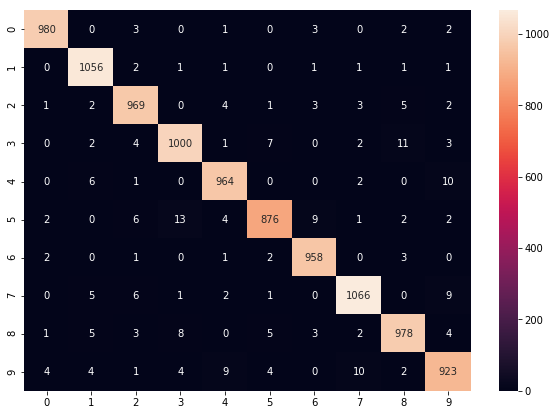

In [12]:
predicted1 = classifier1.predict(X_val)
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted1))

cm=metrics.confusion_matrix(Y_val,predicted1)
print("\nConfusion matrix for Validation")
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

Accuracy: 0.9748 for Test

Confusion matrix for Test


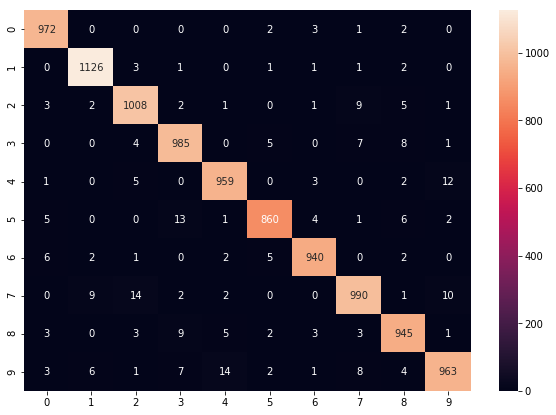

In [16]:
predicted2 = classifier1.predict(X_test)
print("Accuracy: %0.4f for Test" % metrics.accuracy_score(Y_test, predicted2))

cm=metrics.confusion_matrix(Y_test,predicted2)
print("\nConfusion matrix for Test")
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

Accuracy: 0.3991 for UPSPS

Confusion matrix for UPSPS


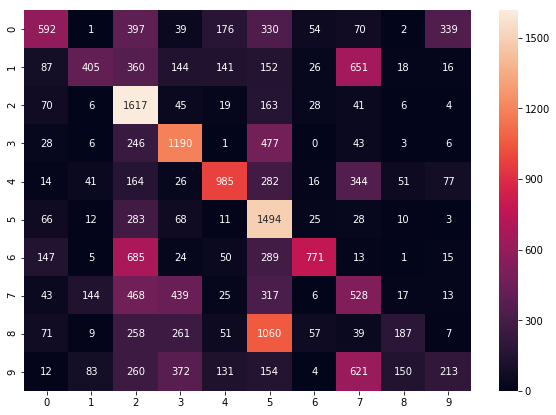

In [15]:
predicted3 = classifier1.predict(UPSPS_f)
print("Accuracy: %0.4f for UPSPS" % metrics.accuracy_score(UPSPS_target, predicted3))

cm=metrics.confusion_matrix(UPSPS_target,predicted3)
print("\nConfusion matrix for UPSPS")
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

In [17]:
predicted = classifier1.predict(X_train)
np.savetxt('SVM_MNIST_Train.csv',predicted, delimiter=",")
np.savetxt('SVM_MNIST_Test.csv',predicted2, delimiter=",")
np.savetxt('SVM_MNIST_Val.csv',predicted1, delimiter=",")
np.savetxt('SVM_MNIST_UPSPS.csv',predicted3, delimiter=",")

# SVM Linear

In [4]:
classifier2 = SVC(kernel='linear', C=2, gamma = 0.005) 
classifier2.fit(X_train, Y_train)
classifier2.score(X_train, Y_train)

0.97582

Accuracy: 0.9377 for Validation

Confusion matrix for Validation


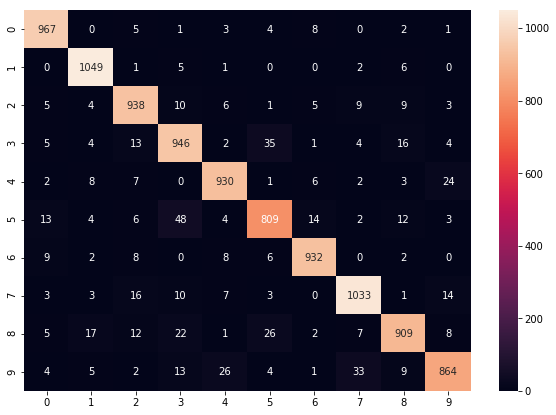

In [5]:
predicted = classifier2.predict(X_val)
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted))

cm=metrics.confusion_matrix(Y_val,predicted)
print("\nConfusion matrix for Validation")
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

Accuracy: 0.9364 for Test

Confusion matrix for Test


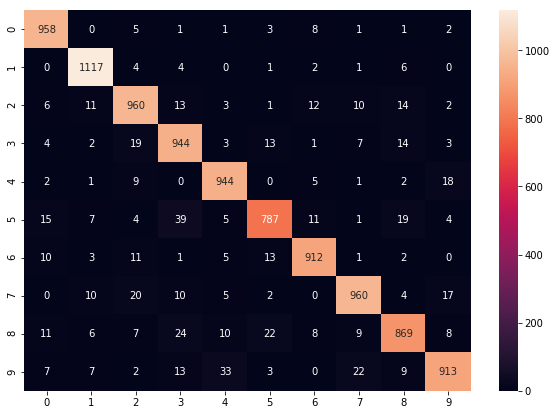

In [6]:
predicted = classifier2.predict(X_test)
print("Accuracy: %0.4f for Test" % metrics.accuracy_score(Y_test, predicted))

cm=metrics.confusion_matrix(Y_test,predicted)
print("\nConfusion matrix for Test")
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

Accuracy: 0.2854 for UPSPS

Confusion matrix for UPSPS


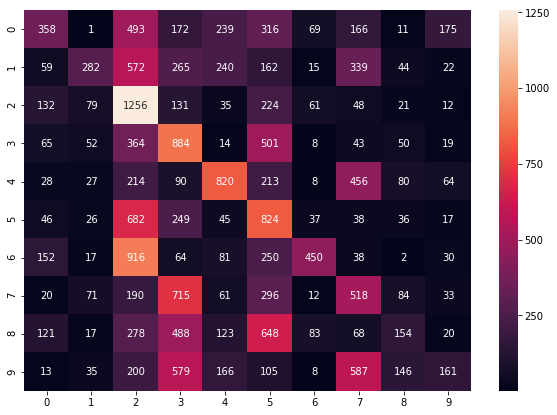

In [7]:
predicted = classifier2.predict(UPSPS_f)
print("Accuracy: %0.4f for UPSPS" % metrics.accuracy_score(UPSPS_target, predicted))

cm=metrics.confusion_matrix(UPSPS_target,predicted)
print("\nConfusion matrix for UPSPS")
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")

In [14]:
classifier2 = LinearSVC() 
classifier2.fit(X_train, Y_train)
classifier2.score(X_train, Y_train)

0.92618

In [15]:
predicted = classifier2.predict(X_val)
print("Confusion matrix for Validation:\n%s" % metrics.confusion_matrix(Y_val, predicted))
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted))

predicted = classifier2.predict(X_test)
print("Confusion matrix for Test:\n%s" % metrics.confusion_matrix(Y_test, predicted))
print("Accuracy: %0.4f for Test" % metrics.accuracy_score(Y_test, predicted))

predicted = classifier2.predict(UPSPS_f)
print("Confusion matrix for UPSPS:\n%s" % metrics.confusion_matrix(UPSPS_target, predicted))
print("Accuracy: %0.4f for UPSPS" % metrics.accuracy_score(UPSPS_target, predicted))

Confusion matrix for Validation:
[[ 965    0    7    1    2    2    6    4    4    0]
 [   0 1042    4    4    1    5    2    0    6    0]
 [   6   10  893   19   11    5   10   16   20    0]
 [   6    2   18  922    2   35    6    5   24   10]
 [   3    8    3    2  926    4    3    2    3   29]
 [  11    4    7   42    8  776   29    8   21    9]
 [   4    3   12    1    5    6  933    0    3    0]
 [   3    7    7   10    5    0    0 1029    1   28]
 [   4   25   10   22    8   21   10   12  872   25]
 [   4    8    4   18   27    5    1   35    9  850]]
Accuracy: 0.9208 for Validation
Confusion matrix for Test:
[[ 959    0    2    1    0    6    8    2    2    0]
 [   0 1113    4    1    0    1    4    1   11    0]
 [  10    9  910   22   11    4   12   10   40    4]
 [   5    1   19  915    3   21    5   12   20    9]
 [   1    4    5    3  914    0   10    3    5   37]
 [  10    3    1   38   11  762   20    8   31    8]
 [   9    4    6    2    6   20  908    1    2    0]
 [   2

# Extremely Slow in Converging, Unable to run 

In [ ]:
classifier1 = SVC(kernel="rbf", gamma=1)
classifier1.fit(X_train, Y_train)
classifier1.score(X_train, Y_train)

In [ ]:
predicted1 = classifier1.predict(X_val)
print("Confusion matrix for Validation:\n%s" % metrics.confusion_matrix(Y_val, predicted1))
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted1))

predicted2 = classifier1.predict(X_test)
print("Confusion matrix for Test:\n%s" % metrics.confusion_matrix(Y_test, predicted2))
print("Accuracy: %0.4f for Test" % metrics.accuracy_score(Y_test, predicted2))

predicted3 = classifier1.predict(UPSPS_f)
print("Confusion matrix for UPSPS:\n%s" % metrics.confusion_matrix(UPSPS_target, predicted3))
print("Accuracy: %0.4f for UPSPS" % metrics.accuracy_score(UPSPS_target, predicted3))

In [ ]:
classifier1 = SVC(kernel="rbf")
classifier1.fit(X_train, Y_train)
classifier1.score(X_train, Y_train)

In [ ]:
predicted = classifier1.predict(X_val)
print("Confusion matrix for Validation:\n%s" % metrics.confusion_matrix(Y_val, predicted))
print("Accuracy: %0.4f for Validation" % metrics.accuracy_score(Y_val, predicted))

predicted = classifier1.predict(X_test)
print("Confusion matrix for Test:\n%s" % metrics.confusion_matrix(Y_test, predicted))
print("Accuracy: %0.4f for Test" % metrics.accuracy_score(Y_test, predicted))

predicted = classifier1.predict(UPSPS_f)
print("Confusion matrix for UPSPS:\n%s" % metrics.confusion_matrix(UPSPS_target, predicted))
print("Accuracy: %0.4f for UPSPS" % metrics.accuracy_score(UPSPS_target, predicted))